# Educational Effects on Income, Occupation, and Capital Gains

In [49]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


## Introduction
We often hear that higher levels of education are necessary to achieve higher levels of income. This information is important for policy makers as they shape regulations in an attempt to strengthen the workforce and the economy. 

Using data from the US Census, I will explore how education impacts income, occupation, and capital gains. My hypothesis is that more education is correlated with "white collar" occupations, higher income, and more capital gains. Further, I will explore how we might use a machine learning model to predict occupation, income, and capital gains based on education.

## Data
This data comes from https://www.kaggle.com/johnolafenwa/us-census-data

US Adult Census data relating income to social factors such as Age, Education, race etc.

The Us Adult income dataset was extracted by Barry Becker from the 1994 US Census Database. The data set consists of anonymous information such as occupation, age, native country, race, capital gain, capital loss, education, work class and more.
Each row is labelled as either having a salary greater than ">50K" or "<=50K".

Note that the dataset is made up of categorical and continuous features. It also contains missing values
The categorical columns are: workclass, education, maritalstatus, occupation, relationship, race, gender, nativecountry

The continuous columns are: age, educationnum, capitalgain, capitalloss, hoursper_week

This Dataset was obtained from the UCI repository, it can be found on

https://archive.ics.uci.edu/ml/datasets/census+income,
http://mlr.cs.umass.edu/ml/machine-learning-databases/adult/

## Methodology
I explored the dataset using a variety of basic exploratory data analysis techniques. I found little correlation between any of the continuous variables. 

For the categorical variables, I found that:
#Most workers make less than 50K
#Most workers are from the U.S.
#Most workers are husbands or not in family
#Most workers are male
#Most workers are white
#Workers are in a wide variety of occupations
#Most workers are in the private sector
#Most workers are married or never married
#Most workers have a HS grad, bacehlors, or some college
#Most workers are between the ages of 18 and 50
#Most workers have low capital gains
#Most workers have zero capital loss
#Most workers have 8-15 years of education
#Most workers work 40 hours per week

Knowing that most of the people in this dataset are white, male, U.S.-born, employed in the private sector, and work 40 hours per week, I'd like to understand the impact of education on their occupation, income, and capital gains. It may also be interesting to explore the impact of gender.

In [4]:
df=pd.read_csv("C:/Users/kylec/OneDrive/Desktop/Coursera/us_adult_income.csv")

In [9]:
df.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [11]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [12]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

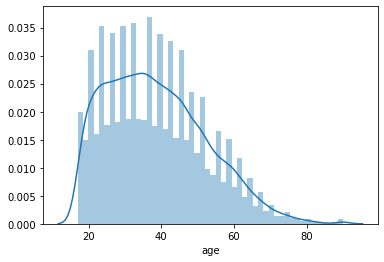

In [13]:
sns.distplot(df['age'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002C0671D42E0>,
      dtype=object)

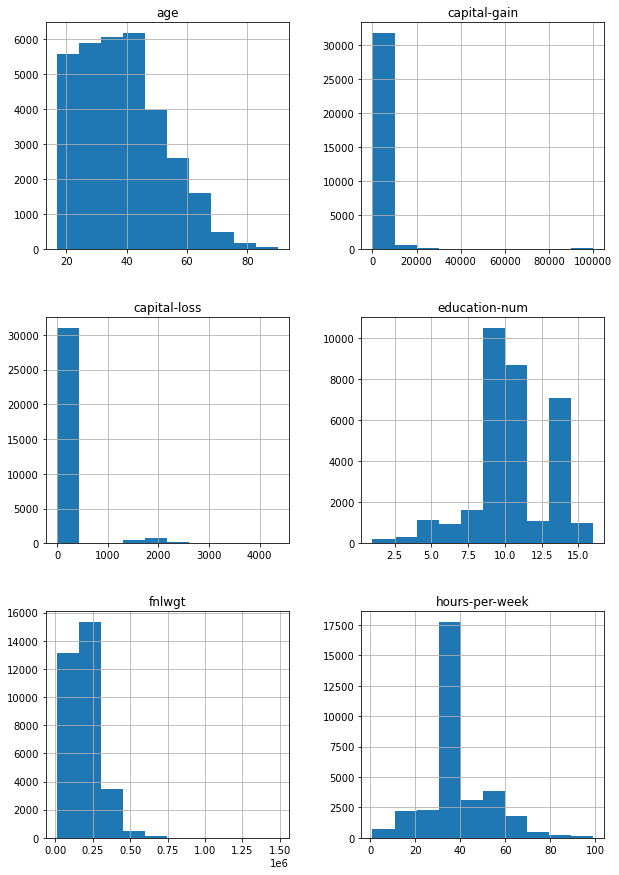

In [17]:
df.hist(figsize=(10,15))

[Text(0, 0, ' Bachelors'),
 Text(0, 0, ' HS-grad'),
 Text(0, 0, ' 11th'),
 Text(0, 0, ' Masters'),
 Text(0, 0, ' 9th'),
 Text(0, 0, ' Some-college'),
 Text(0, 0, ' Assoc-acdm'),
 Text(0, 0, ' Assoc-voc'),
 Text(0, 0, ' 7th-8th'),
 Text(0, 0, ' Doctorate'),
 Text(0, 0, ' Prof-school'),
 Text(0, 0, ' 5th-6th'),
 Text(0, 0, ' 10th'),
 Text(0, 0, ' 1st-4th'),
 Text(0, 0, ' Preschool'),
 Text(0, 0, ' 12th')]

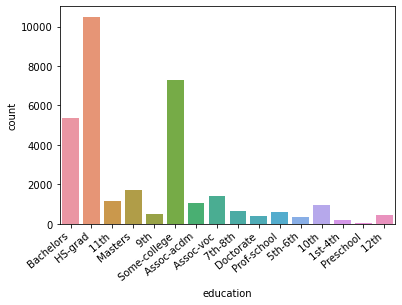

In [26]:
#Most workers have a HS grad, bacehlors, or some college
ax1=sns.countplot(df['education'])
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=40, ha="right")

[Text(0, 0, ' Never-married'),
 Text(0, 0, ' Married-civ-spouse'),
 Text(0, 0, ' Divorced'),
 Text(0, 0, ' Married-spouse-absent'),
 Text(0, 0, ' Separated'),
 Text(0, 0, ' Married-AF-spouse'),
 Text(0, 0, ' Widowed')]

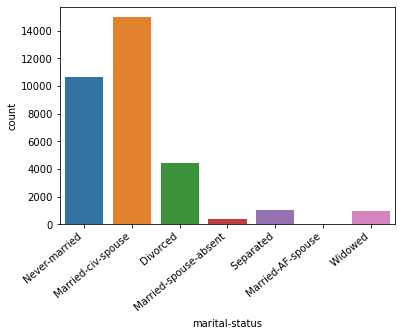

In [28]:
#Most workers are married or never married
ax3 = sns.countplot(df['marital-status'])
ax3.set_xticklabels(ax3.get_xticklabels(),rotation=40, ha="right")

[Text(0, 0, ' State-gov'),
 Text(0, 0, ' Self-emp-not-inc'),
 Text(0, 0, ' Private'),
 Text(0, 0, ' Federal-gov'),
 Text(0, 0, ' Local-gov'),
 Text(0, 0, ' ?'),
 Text(0, 0, ' Self-emp-inc'),
 Text(0, 0, ' Without-pay'),
 Text(0, 0, ' Never-worked')]

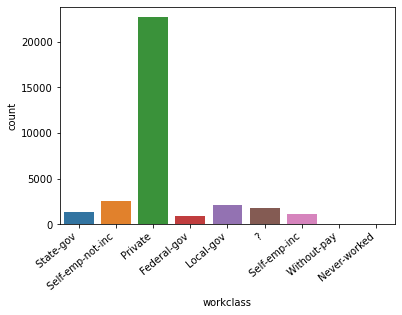

In [29]:
#Most workers are in the private sector
ax2 = sns.countplot(df['workclass'])
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=40, ha="right")

[Text(0, 0, ' Adm-clerical'),
 Text(0, 0, ' Exec-managerial'),
 Text(0, 0, ' Handlers-cleaners'),
 Text(0, 0, ' Prof-specialty'),
 Text(0, 0, ' Other-service'),
 Text(0, 0, ' Sales'),
 Text(0, 0, ' Craft-repair'),
 Text(0, 0, ' Transport-moving'),
 Text(0, 0, ' Farming-fishing'),
 Text(0, 0, ' Machine-op-inspct'),
 Text(0, 0, ' Tech-support'),
 Text(0, 0, ' ?'),
 Text(0, 0, ' Protective-serv'),
 Text(0, 0, ' Armed-Forces'),
 Text(0, 0, ' Priv-house-serv')]

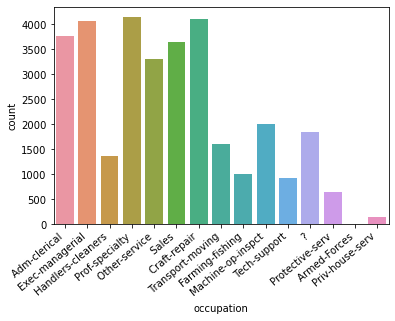

In [30]:
#Workers are in a wide variety of occupations
ax4 = sns.countplot(df['occupation'])
ax4.set_xticklabels(ax4.get_xticklabels(),rotation=40, ha="right")

[Text(0, 0, ' White'),
 Text(0, 0, ' Black'),
 Text(0, 0, ' Asian-Pac-Islander'),
 Text(0, 0, ' Amer-Indian-Eskimo'),
 Text(0, 0, ' Other')]

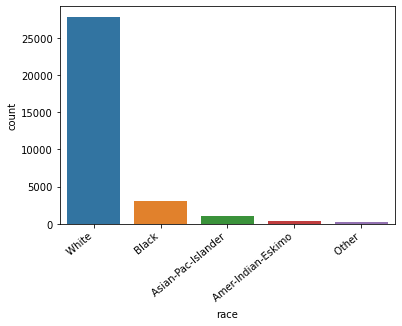

In [32]:
#Most workers are white
ax5 = sns.countplot(df['race'])
ax5.set_xticklabels(ax5.get_xticklabels(),rotation=40, ha="right")

[Text(0, 0, ' Male'), Text(0, 0, ' Female')]

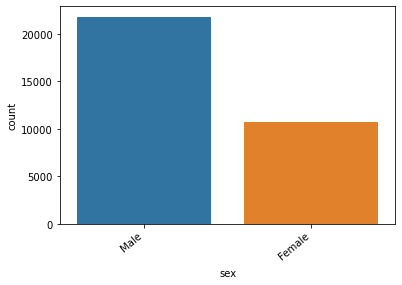

In [33]:
#Most workers are male
ax6 = sns.countplot(df['sex'])
ax6.set_xticklabels(ax6.get_xticklabels(),rotation=40, ha="right")

[Text(0, 0, ' Not-in-family'),
 Text(0, 0, ' Husband'),
 Text(0, 0, ' Wife'),
 Text(0, 0, ' Own-child'),
 Text(0, 0, ' Unmarried'),
 Text(0, 0, ' Other-relative')]

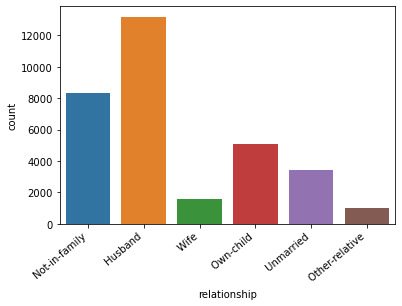

In [34]:
#Most workers are husbands or not in family
ax7 = sns.countplot(df['relationship'])
ax7.set_xticklabels(ax7.get_xticklabels(),rotation=40, ha="right")

[Text(0, 0, ' United-States'),
 Text(0, 0, ' Cuba'),
 Text(0, 0, ' Jamaica'),
 Text(0, 0, ' India'),
 Text(0, 0, ' ?'),
 Text(0, 0, ' Mexico'),
 Text(0, 0, ' South'),
 Text(0, 0, ' Puerto-Rico'),
 Text(0, 0, ' Honduras'),
 Text(0, 0, ' England'),
 Text(0, 0, ' Canada'),
 Text(0, 0, ' Germany'),
 Text(0, 0, ' Iran'),
 Text(0, 0, ' Philippines'),
 Text(0, 0, ' Italy'),
 Text(0, 0, ' Poland'),
 Text(0, 0, ' Columbia'),
 Text(0, 0, ' Cambodia'),
 Text(0, 0, ' Thailand'),
 Text(0, 0, ' Ecuador'),
 Text(0, 0, ' Laos'),
 Text(0, 0, ' Taiwan'),
 Text(0, 0, ' Haiti'),
 Text(0, 0, ' Portugal'),
 Text(0, 0, ' Dominican-Republic'),
 Text(0, 0, ' El-Salvador'),
 Text(0, 0, ' France'),
 Text(0, 0, ' Guatemala'),
 Text(0, 0, ' China'),
 Text(0, 0, ' Japan'),
 Text(0, 0, ' Yugoslavia'),
 Text(0, 0, ' Peru'),
 Text(0, 0, ' Outlying-US(Guam-USVI-etc)'),
 Text(0, 0, ' Scotland'),
 Text(0, 0, ' Trinadad&Tobago'),
 Text(0, 0, ' Greece'),
 Text(0, 0, ' Nicaragua'),
 Text(0, 0, ' Vietnam'),
 Text(0, 0, ' Hon

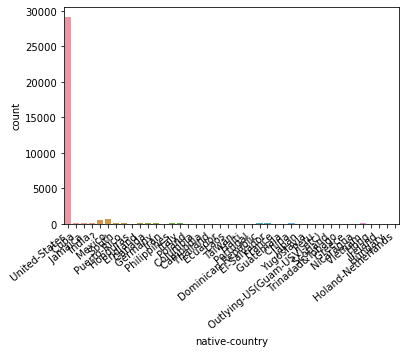

In [35]:
#Most workers are from the U.S.
ax8 = sns.countplot(df['native-country'])
ax8.set_xticklabels(ax8.get_xticklabels(),rotation=40, ha="right")

[Text(0, 0, ' <=50K'), Text(0, 0, ' >50K')]

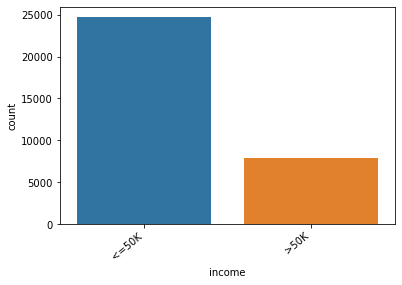

In [36]:
#Most workers make less than 50K
ax8 = sns.countplot(df['income'])
ax8.set_xticklabels(ax8.get_xticklabels(),rotation=40, ha="right")

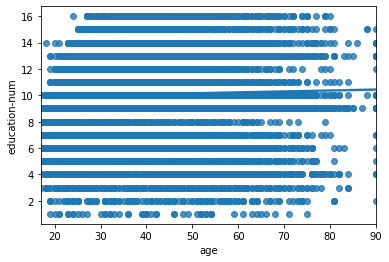

In [37]:
sns.regplot(df['age'],df['education-num'])

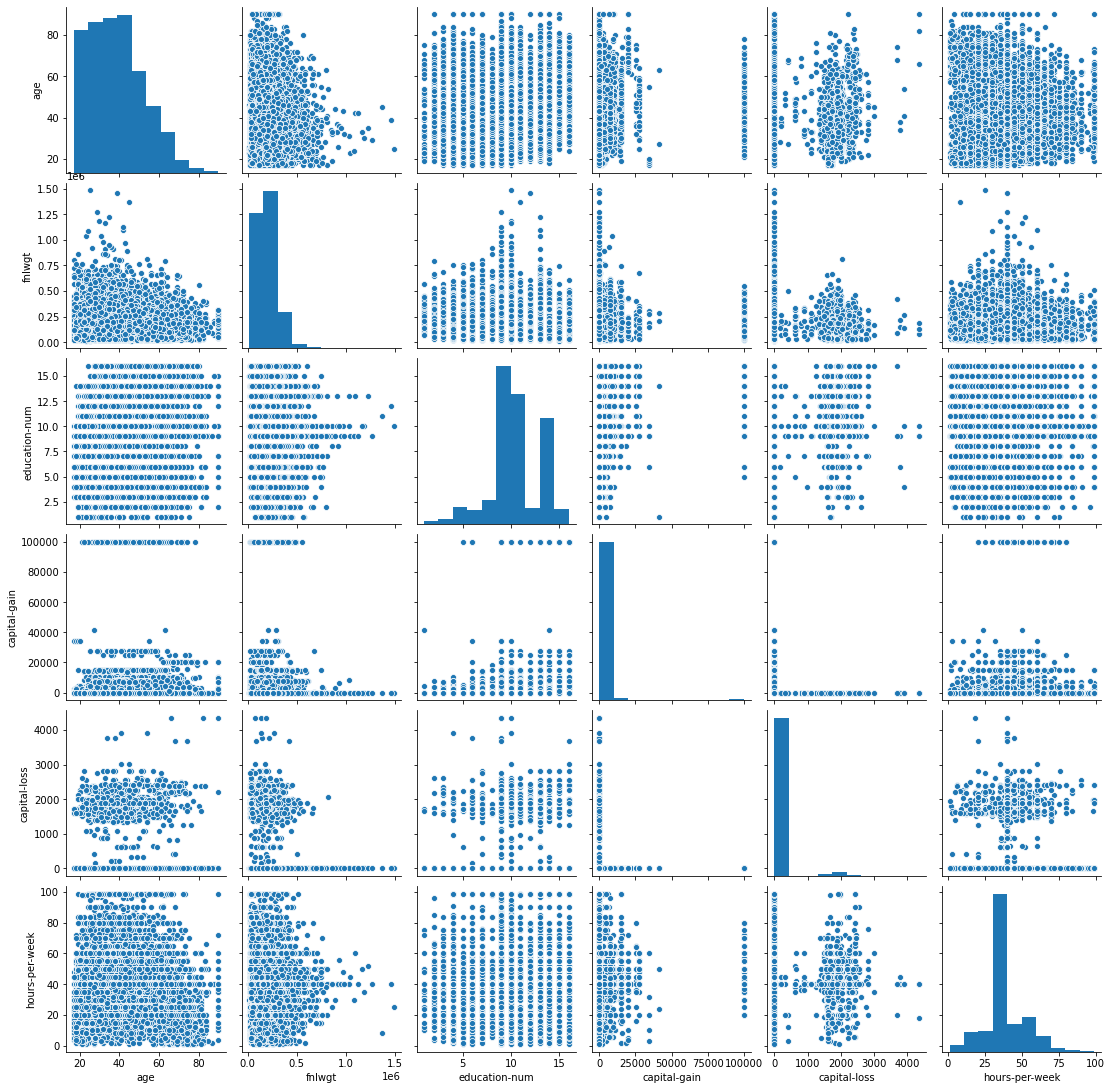

In [38]:
sns.pairplot(df)

In [44]:
df.duplicated().sum()

0

In [45]:
df[df.duplicated()==True]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income


In [43]:
df.drop_duplicates(inplace=True)

In [46]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [47]:
np.round(df.corr(),2)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.00,-0.08,0.04,0.08,0.06,0.07
fnlwgt,-0.08,1.00,-0.04,0.00,-0.01,-0.02
education-num,0.04,-0.04,1.00,0.12,0.08,0.15
capital-gain,0.08,0.00,0.12,1.00,-0.03,0.08
capital-loss,0.06,-0.01,0.08,-0.03,1.00,0.05
hours-per-week,0.07,-0.02,0.15,0.08,0.05,1.00


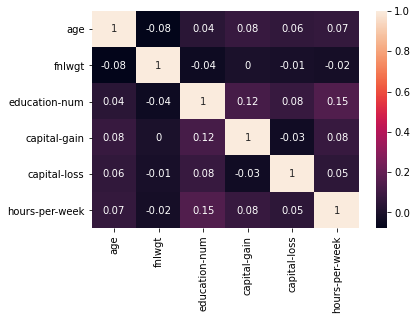

In [48]:
sns.heatmap(np.round(df.corr(),2),annot=True)